## Import modules

In [1]:
import pandas as pd
import numpy as np

## Create Fake Datasets

In [2]:
def get_dataset(size):
    """Create Fake Dataset: Food, Color, Age, Date, Bool, Prob
    Args:
        size (int): Size of Fake Dataset

    Returns:
        df (pd.DataFrame): Fake Dataset
    """
    df = pd.DataFrame()
    df['Weather'] = np.random.choice(['Sunny', 'Rainy'], size)
    df['Date'] = np.random.randint(1, 31, size)
    df['Food1'] = np.random.choice(['냉면','칼국수','비빔면', '라면'], size)
    df['Food2'] = np.random.choice(['삼겹살','제육볶음','돈카츠'], size)
    df['Score'] = np.random.uniform(0.01, 1, size)
    return df
df = get_dataset(5_000_000)
df

,Weather,Date,Food1,Food2,Score
0,Rainy,23,칼국수,삼겹살,0.310735
1,Rainy,3,칼국수,삼겹살,0.265081
2,Rainy,29,칼국수,돈카츠,0.296546
3,Sunny,27,냉면,제육볶음,0.206094
4,Rainy,8,칼국수,삼겹살,0.015338
...,...,...,...,...,...
4999995,Rainy,23,라면,돈카츠,0.423493
4999996,Rainy,28,냉면,삼겹살,0.845390
4999997,Rainy,19,비빔면,돈카츠,0.010088
4999998,Rainy,5,비빔면,삼겹살,0.229610


## The Problems
0. 날짜가 25일 이상이면 Food1(면요리)
1. 비가 안오면서 Score가 0.5 초과이어도 Food1(면요리)
2. 그렇지 않으면 Food2(고기먹기)

In [3]:
def calculate_result(row):
    if row['Date'] >= 25:
        return row['Food1']
    if (row['Weather']=='Sunny') & (row['Score'] > 0.5):
        return row['Food1']
    else:
        return row['Food2']

## Loop

In [4]:
%%timeit
df = get_dataset(100_000)
for idx, row in df.iterrows():
    df.loc[idx, 'menu'] = calculate_result(row)

3min 33s ± 35.8 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Apply

In [5]:
%%timeit
df = get_dataset(100_000)
df['menu'] = df.apply(calculate_result, axis=1)

1.29 s ± 247 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Vectorized

In [6]:
%%timeit
df = get_dataset(100_000)
df['menu'] = df['Food2']
mask = ((df['Weather']=='Sunny') & (df['Score'] > 0.5)) | (df['Date'] >= 25 )
df.loc[mask, 'menu'] = df['Food1']

53.1 ms ± 8.84 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Plot Difference

<AxesSubplot:title={'center':'Time to Calculate Row'}, xlabel='Type'>

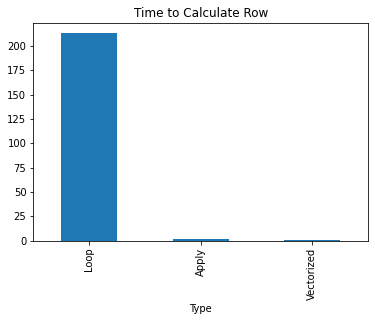

In [14]:
results = pd.DataFrame(
    [
        ["Loop", 213, 35.8],
        ["Apply", 1.29, 0.247],
        ["Vectorized", 0.0531, 0.00884]
    ], columns=['Type', 'Mean', "Stdev"]
)

results.set_index('Type')['Mean'].plot(kind='bar', title='Time to Calculate Row')

데이터 행수가 많아 차이가 크게 보인다.
그만큼 Loop보다 Vectorized화 시키는 게 작업을 효율적으로 하는 방법인 셈이다.